In [1]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### The following codes show the results for section 02 on polynomial Interpolation

#### Polynomial interpolation  of $e^x$  Example 2.2.3



$\begin{align*}
f(x) = e^x \approx \sum_{k=0}^{n} c_{k} x^{k} = p_n(x)
\end{align*}$

We consider points $x_{0},x_{1},...,x_{n}$ in the interval $[-1,1]$ with interpolation condition $f(x_j) = s_n(x_j)$ for $j = 0,1,...,n$


Thus we have that 

$\begin{align*}
f(x_0) = p_n(x_0)=c_{0}x_{0}^{0} + c_{1}x_{0}^{1}+c_{2}x_{0}^{2}+\cdots+c_{n}x_{0}^{n}\\
f(x_1) = p_n(x_1)=c_{0}x_{1}^{0} + c_{1}x_{1}^{1}+c_{2}x_{1}^{2}+\cdots+c_{n}x_{1}^{n}\\
f(x_2) = p_n(x_2)=c_{0}x_{2}^{0}+c_{1}x_{2}^{1}+c_{2}x_{2}^{2}+\cdots+c_{n}x_{2}^{n}\\
\vdots   \\
f(x_n) = p_n(x_{n})=c_{0}x_{n}^{0} + c_{1}x_{n}^{1}+c_{2}x_{n}^{2}+\cdots+c_{n}x_{n}^{n}\\
\end{align*}$

$\begin{bmatrix}
f(x_0) \\
f(x_1)\\
f(x_2)\\
\vdots \\
f(x_{n})
\end{bmatrix}$ =
$\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \cdots & x_{0}^{n}\\
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{n}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{n}\\
\vdots & \vdots & \vdots & \cdots & \vdots\\
1 & x_{n} & x_{n}^{2} & \cdots & x_{n}^{n}
\end{bmatrix}$
$\begin{bmatrix}
c_0 \\
c_1\\
c_2\\
\vdots \\
c_{n}
\end{bmatrix}$ 

Therefore, we have that $$\textbf{f} = V \textbf{c}$$

Where $V$ is the Vandermonde Matrix and $\textbf{c}$ is the vector of the coefficients


The code below computes the coefficients $c_k$

In [2]:
x = np.linspace(-1,1,10)  # interpolation points
n = 10                    # Number of expansion terms in the series
V= np.vander(x,n,increasing=True)  # Creates the Vandermonde matrix.
f=np.exp(x)                    # function values
c=np.linalg.lstsq(V,f,rcond=-1)[0] # computes the coefficients 
print(c)        # prints the coefficients

[1.00000000e+00 1.00000000e+00 4.99999993e-01 1.66666666e-01
 4.16667576e-02 8.33334158e-03 1.38851515e-03 1.98378793e-04
 2.53688482e-05 2.80721794e-06]


We now define a function exp_error(m,n),this function takes in the parameter m which is the total number of interpolation points and $n$ which is the number of expansion terms in the series. It then computes the coefficients $c$, find $p_n(x)=\sum_{k=0}^{n} c_{k} x^{k} $ and computes the error of approximation $\,$ 

$error_n = || f(x) - p_n(x) ||_{\infty}$ $\approx \max_{{j=1,2,...,1000}} | f(xx_j) - p_n(xx_j)|$

In [3]:
def exp_error(m,n):
    'This function computes the interpolation error'
    
    x1 = np.linspace(-1,1,m)  # interpolation points
    f=np.exp(x1)              # function values  
    c1 = np.polyfit(x1, f, n-1)  # computing the coefficients
    
 #checking the error with more interpolation points 
    xx=np.linspace(-1,1,1000)  # new set of interpolation points to evalute P(x)
    ff=np.exp(xx)    # function values at the new set of interpolation points
    pp = np.polyval(c1, xx)  # evalutes the values for the polynomial P(x) with the new set of interpolation points
    err1=[]          # create list to append the error
    err1_n= np.linalg.norm(pp - ff,ord=np.inf)  # Evalutes the error in interpolation
    err1.append(err1_n) # appends the evaluated error to the list err1
    return(err1)   # returns the list of the error



### We now investigate the error in the polynomial interpolation when we use a square matrix $(n \times n)$ and when we use an overdetermined system $2n \times n$

## For  the case $(n \times n)$

In [4]:
def plt_error1():
    'This function computes the error for the case n*n'
    Tn=[] #intialise list to append the error values at different values of n
    for n in range(2,20):
        T=exp_error(n,n) # computes the error
        Tn.append(T)  # appends the error to the initialised list
    return(Tn)
    
    
    

## Plotting the Error using semilogy 

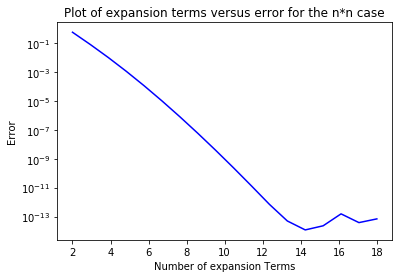

In [5]:
y=plt_error1()  # error terms
x=np.linspace(2,18,18) # number of number of expansion terms/interpolation points
plt.semilogy(x,y,'b') # plotting number of expansion terms against the error
plt.xlabel('Number of expansion Terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error for the n*n case')
plt.savefig('Plot_of_error_case1.png')
plt.show()



## For  the case $(2n \times n)$

In [6]:
def plt_error2():
    'This function computes the error for the case 2n*n'
    Dn=[] #intialise list to append the error values at different values of n
    for n in range(2,20):
        D=exp_error(2*n,n) # computes the error
        Dn.append(D)  # appends the error to the initialised list
    return(Dn)
    

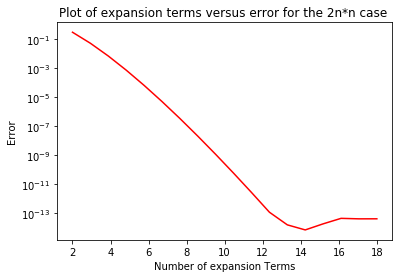

In [7]:
y_2=plt_error2()  # error terms for the 2n*n case        
xx=np.linspace(2,18,18)   # number of number of expansion terms/interpolation points
plt.semilogy(xx,y_2,'r')  # plotting number of expansion terms against the error
plt.xlabel('Number of expansion Terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error for the 2n*n case ')
plt.savefig('Plot_of_error_case2.png')
plt.show()

In [8]:
### Comparing the plots for n*n and (2*n)*n

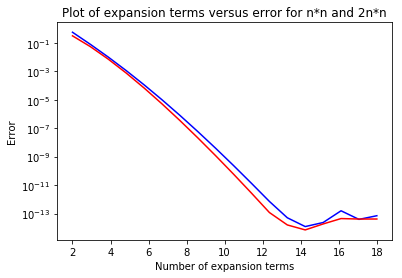

In [9]:
#Plotting the error for n*n and (2*n)*n cases
plt.semilogy(x,y,'b',xx,y_2,'r')
plt.xlabel('Number of expansion terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error for n*n and 2n*n')
plt.savefig('Plot_of_error_both_cases.png')
plt.legend
plt.show()

### Listing the error terms for the $n\times n$ case for in range $(2,12)$

In [10]:
for n in range(2,12):
        T=exp_error(n,n) # computes the error
        print(T)  


[0.5576031261175987]
[0.07852611789155017]
[0.009984724810795154]
[0.0011244170182336255]
[0.00011216124123780702]
[9.980036194345843e-06]
[7.988929398017319e-07]
[5.800901092811728e-08]
[3.849873753125621e-09]
[2.3508306412622915e-10]


### Listing the error terms for the $2n \times n$ case for in range $(2,12)$

In [12]:
for n in range(2,12):
        D=exp_error(2*n,n) # computes the error
        print(D)

[0.3116753072446161]
[0.05415791472946574]
[0.0071316311721467684]
[0.0007554545477290731]
[6.706745358853183e-05]
[5.137977233005131e-06]
[3.4702014550802573e-07]
[2.1008553119372664e-08]
[1.154785156387561e-09]
[5.822364812502201e-11]


### Polynomial interpolation Example 2.2.4

In [13]:
x=[0,1,-1,2,-2]                 # interpolation points/nodes
f=[-5,-3,-15,39,-9]             # function values
V= np.vander(x,increasing=True)  # Creates the Vandermonde matrix.
c=np.linalg.lstsq(V,f,rcond=-1)[0] # computes the coefficients 
print(c) # prints the coefficients


[-5.  4. -7.  2.  3.]


Polyfit can also be used to determine the coefficients where by the output of the Polynomial coefficients starts with the highest power.

In [14]:
x=[0,1,-1,2,-2]    # interpolation points
f=[-5,-3,-15,39,-9]   # function values 
c=np.polyfit(x,f,len(x)-1) # computes the coefficients 
print(c) # prints the coefficients

[ 3.  2. -7.  4. -5.]


### Runge Phenomenon Interpolation Example

In [15]:
# We Demonstrate the Runge phenomenon and how it can be partially overcome with
# oversampling.


In [16]:
def fun_runge(x):
    'This function returns the value of f at a specified value of x '
    f=1/(1 + 25*x**2) # defines the Runge function f
    return(f)

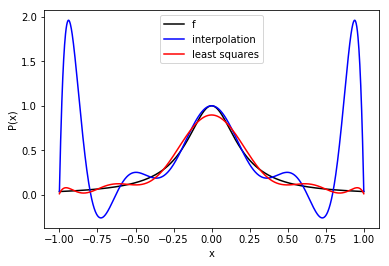

In [17]:
n=11  # total number of interpolation points
x1=np.linspace(-1,1,n)   # interpolation points or nodes
xx=np.linspace(-1,1,1000) # more interpolation points
c1=np.polyfit(x1,fun_runge(x1),n-1) # computes the coefficients
pp1=np.polyval(c1,xx)       # evalutes the values for the polynomial P(x) with more interpolation points
x2=np.linspace(-1,1,5*n)   # interpolation points for the least squares case
c2=np.polyfit(x2,fun_runge(x2),n-1) # computes the coefficients for the least squares case
pp2=np.polyval(c2,xx)  # evalutes the values for the polynomial P(x) with more interpolation points for the least squares case

# plotting the interpolants
plt.plot(xx, fun_runge(xx),'k', xx, pp1, 'b', xx, pp2, 'r')
plt.xlabel('x')   
plt.ylabel('P(x)')
label=['f', 'interpolation', 'least squares']
plt.legend(label,loc='upper center')
plt.xlabel('x');
plt.savefig('Runge_example.png')
plt.show()     


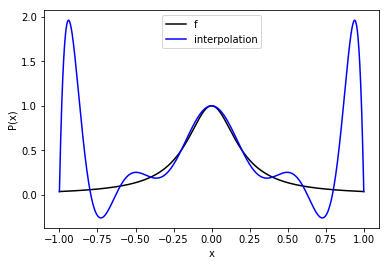

In [18]:

# plotting the interpolants
plt.plot(xx, fun_runge(xx),'k', xx, pp1, 'b')
plt.xlabel('x')   
plt.ylabel('P(x)')
label=['f', 'interpolation']
plt.legend(label,loc='upper center')
plt.xlabel('x')
plt.savefig('Runge_example1.png')
plt.show()     


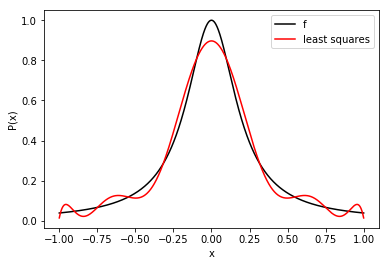

In [19]:

# plotting the interpolants
plt.plot(xx, fun_runge(xx),'k', xx, pp2, 'r')
plt.xlabel('x')   
plt.ylabel('P(x)')
label=['f', 'least squares']
plt.legend(label,loc='left center')
plt.xlabel('x')
plt.savefig('Runge_example2.png')
plt.show()     


### checking the error with more interpolation points

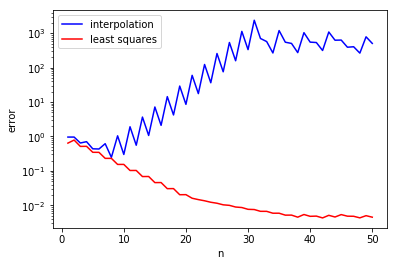

In [20]:
ff=fun_runge(xx) #computes the value of the function with more interpolation points 
nn=np.arange(1,51) # range for the number of interpolation points
err1 = [] # list of error for interpolation
err2 = []  # list of error for least squares
for n in range(1,51):
    x1 = np.linspace(-1,1,n)   # interpolation points or nodes
    c1 = np.polyfit(x1, fun_runge(x1), n-1)  # computes the coefficients
    pp = np.polyval(c1, xx)   # evalutes the values for the polynomial P(x) with more interpolation points
    err1_n= np.linalg.norm(pp - ff,ord=np.inf)  # computes the error for interpolation
    err1.append(err1_n)        # appends the error for interpolation to list err1
    x2 = np.linspace(-1,1,3*n)           # interpolation points for the least squares case
    c2 = np.polyfit(x2, fun_runge(x2), n-1)   # computes the coefficients for the least squares case
    pp = np.polyval(c2, xx) # evalutes the values for the polynomial P(x) with more interpolation points for the least squares case
    err2_n =np.linalg.norm(pp - ff,ord=np.inf) # computes the error for the least squares case
    err2.append(err2_n)  # appends the error for least squares to list err2
    
# plotting the error for interpolation and least squares cases
plt.semilogy(nn, err1,'b', nn, err2,'r')
plt.ylabel('error')
plt.xlabel('n')
label=['interpolation', 'least squares']
plt.legend(label,loc='left center')
plt.savefig('Runge_error.png')
plt.show()     
